In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error




df=pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [105]:
df.duplicated().sum()

0

In [106]:
display(df.shape)
display(df.columns)



(9551, 21)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [107]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [108]:
df['Aggregate rating'].describe()


count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [109]:
display((df.describe()))
print('\n')
display((df['Country Code'].value_counts()))
print('\n')
display(df['City'].value_counts().head(10))
print('\n')
display(df['Cuisines'].value_counts().head(10))




,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

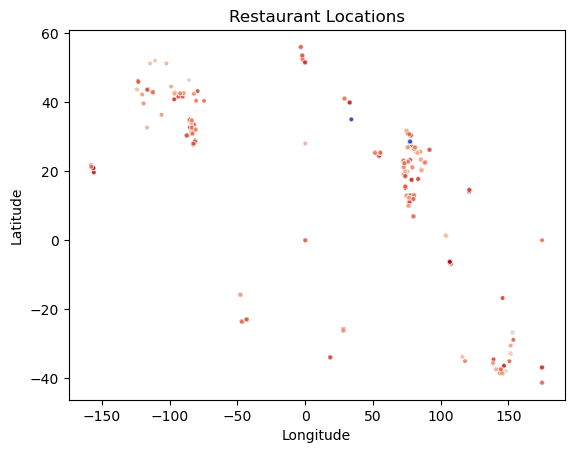

In [110]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm', s=10, legend=False)
plt.title('Restaurant Locations')
plt.show()

In [111]:
display(df['Has Table booking'].value_counts(normalize=True) * 100)
print('\n')
display(df['Has Online delivery'].value_counts(normalize=True) * 100)
print('\n')
display(df.groupby('Has Table booking')['Aggregate rating'].mean())
print('\n')
display(df.groupby(['Price range', 'Has Online delivery'])['Restaurant ID'].count())

Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

Price range  Has Online delivery
1            No                     3743
             Yes                     701
2            No                     1827
             Yes                    1286
3            No                      997
             Yes                     411
4            No                      533
             Yes                      53
Name: Restaurant ID, dtype: int64

In [112]:
display((df['Price range'].value_counts()))
print('\n')
display(df.groupby('Price range')['Aggregate rating'].mean())
print('\n')
display(df.groupby('Rating color')['Aggregate rating'].mean())

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

Rating color
Dark Green    4.659801
Green         4.168119
Orange        3.051619
Red           2.297849
White         0.000000
Yellow        3.683429
Name: Aggregate rating, dtype: float64

In [113]:
df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

df['Has Table Booking Binary'] = df['Has Table booking'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['Has Online Delivery Binary'] = df['Has Online delivery'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
display(df.shape)
display(df)

(9551, 25)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Length,Address Length,Has Table Booking Binary,Has Online Delivery Binary
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,3,4.1,Green,Very Good,788,11,103,0,0
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,3,4.2,Green,Very Good,1034,12,77,0,0
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,4,3.7,Yellow,Good,661,5,73,0,0
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,4,4.0,Green,Very Good,901,11,75,0,0


In [114]:
label = LabelEncoder()
df['City_encoded'] = label.fit_transform(df['City'])
X = df[['Votes', 'Price range', 'Average Cost for two', 'City_encoded', 'Has Table Booking Binary', 'Has Online Delivery Binary']]
Y = df['Aggregate rating']

In [115]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [116]:
def model_training(model,x_test,y_test,model_name):
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)

    display(model_name)
    display("The test result of mean_squared_error:",mean_squared_error(y_test,test_pred))
    display("The test result of mean_absolute_error:",mean_absolute_error(y_test,test_pred))
    display("The test result of r2_score:",r2_score(y_test,test_pred)*100)
    print('\n')


model=RandomForestRegressor()

model_training(model.fit(x_train,y_train),x_test,y_test,model_name='RandomForest' )

model=LinearRegression()
model_training(model.fit(x_train,y_train),x_test,y_test,model_name='LinearRegression')

model=DecisionTreeRegressor()
model_training(model.fit(x_train,y_train),x_test,y_test,model_name='DecisionTree')

model=Ridge()
model_training(model.fit(x_train,y_train),x_test,y_test,model_name='RidgeRegression')


'RandomForest'

'The test result of mean_squared_error:'

0.12040457637535987

'The test result of mean_absolute_error:'

0.22611592728666546

'The test result of r2_score:'

94.71006982143732

'LinearRegression'

'The test result of mean_squared_error:'

1.6663742721792905

'The test result of mean_absolute_error:'

1.0699671337038799

'The test result of r2_score:'

26.788467543783444

'DecisionTree'

'The test result of mean_squared_error:'

0.1961182369221761

'The test result of mean_absolute_error:'

0.2825908256520501

'The test result of r2_score:'

91.38361836989581

'RidgeRegression'

'The test result of mean_squared_error:'

1.6663874300631136

'The test result of mean_absolute_error:'

1.0699734020426446

'The test result of r2_score:'

26.787889457062686

In [117]:
import pandas as pd

df1 = pd.DataFrame({
    'mean_sqaured_error': [0.12003384672411395, 1.6663742721792905, 0.19522788268766597, 1.6663874300631136],
    'mean_absolute_error': [0.2261490466146703, 1.0699671337038799, 0.2821983609738712, 1.0699734020426446],
    'r2_score': [94.72635769046398, 26.788467543783444, 91.42273575128225, 26.787889457062686]
}, index=['RandomForest', 'LinearRegression', 'DecisionTree', 'RidgeRegression'])

display(df1)


,mean_sqaured_error,mean_absolute_error,r2_score
RandomForest,0.120034,0.226149,94.726358
LinearRegression,1.666374,1.069967,26.788468
DecisionTree,0.195228,0.282198,91.422736
RidgeRegression,1.666387,1.069973,26.787889


In [141]:
#Customer Preference Analysis
display(df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10))
print('\n')
display(df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10))


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

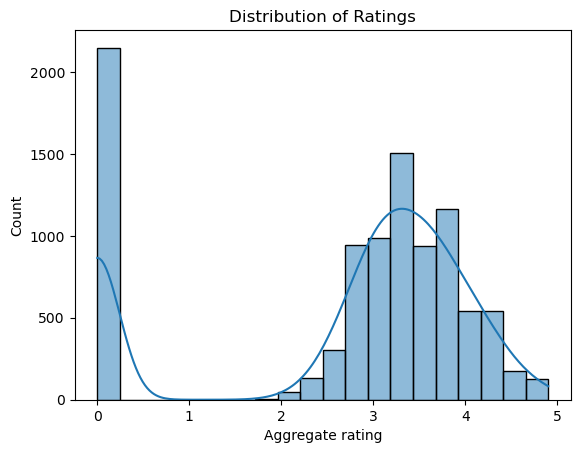

In [145]:
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

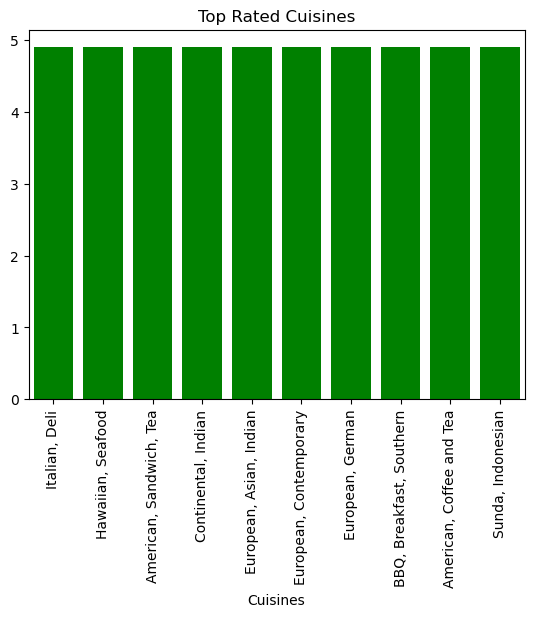

In [156]:
top_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values,facecolor='green')
plt.xticks(rotation=90)
plt.title('Top Rated Cuisines')
plt.show()

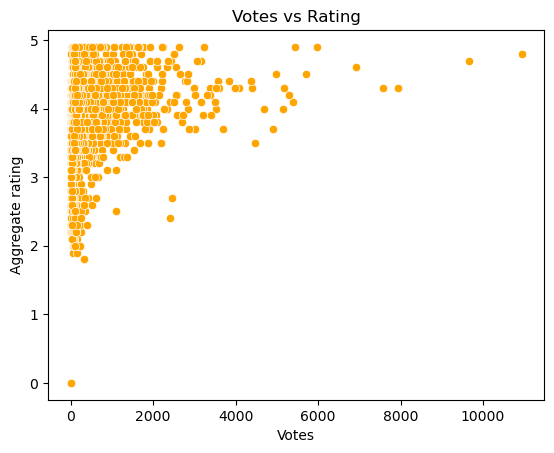

In [168]:
sns.scatterplot(data=df, x='Votes', y='Aggregate rating',facecolor='orange')
plt.title('Votes vs Rating')
plt.show()

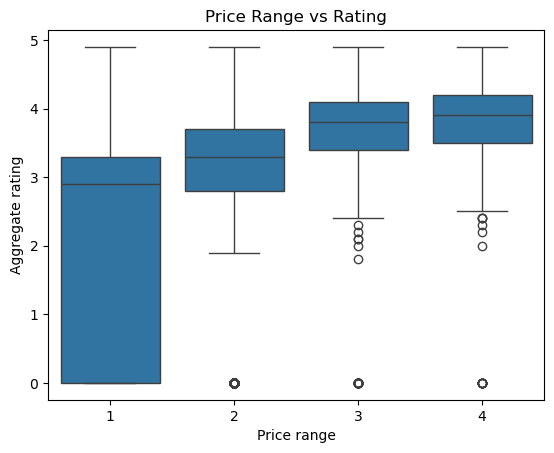

In [180]:
sns.boxplot(data=df, x='Price range', y='Aggregate rating')
plt.title('Price Range vs Rating')
plt.show()
